# Playing with Sunspotter Dataset
Following code is the imitation of example in [database](https://github.com/sunspotter/database/blob/master/example_analysis.py) repository.
## Reading data set

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from mirapy.visualization import visualize_2d, visualize_3d
import matplotlib.pyplot as plt

pd.options.display.max_columns = None
%matplotlib inline

In [2]:
images = pd.read_csv("all_clear_dataset/lookup_properties.csv", sep=';')
fitsfiles = pd.read_csv("all_clear_dataset/lookup_timesfits.csv", sep=';')
classification = pd.read_csv("all_clear_dataset/classifications.csv", sep=';')
zoorank = pd.read_csv("all_clear_dataset/rankings.csv", sep=';')

## Joining images, rank and fitsfiles (dates)

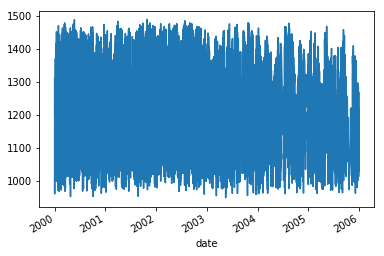

In [3]:
df1 = pd.merge(images, fitsfiles, how='inner', left_on='id_filename', right_on='id')
df = pd.merge(zoorank, df1, how='inner', left_on='image_id', right_on='id_x')
df['date'] = pd.to_datetime(df['obs_date'])
df.set_index('date', inplace=True)
df['score'].plot()

In [4]:
display(df.head())

,id,image_id,count,k_value,score,std_dev,id_x,filename_x,zooniverse_id,angle,area,areafrac,areathesh,bipolesep,c1flr24hr,id_filename,flux,fluxfrac,hale,hcpos_x,hcpos_y,m1flr12hr,m5flr12hr,n_nar,noaa,pxpos_x,pxpos_y,sszn,zurich,id_y,filename_y,obs_date
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2003-05-16 12:46:59,1,9843,50,8,950.403592,1.455031,9843,530be17a3ae74079c3004cf1.jpg,ASZ00001pz,42.2014,36800.0,-0.00,237.0,2.80,0,9843,1.280000e+22,-0.02,alpha,637.259800,-73.593013,0,0,1,10360,211.63060,153.80934,9843,axx,9843,20030516_1246_mdiB_1_0360.fits,2003-05-16 12:46:59
2000-04-24 12:51:03,2,999,50,8,953.549821,1.717277,999,530be1223ae74079c30007d9.jpg,ASZ00008tj,64.3741,53100.0,0.02,248.0,-1.00,0,999,1.580000e+22,0.02,beta,813.492460,-273.070680,0,0,1,8955,163.61865,191.88909,999,cso,999,20000424_1251_mdiB_1_8955.fits,2000-04-24 12:51:03
2000-10-04 12:51:02,3,2437,50,8,954.324334,2.209654,2437,530be1303ae74079c3001315.jpg,ASZ00009la,58.9458,55000.0,0.09,942.0,2.63,0,2437,2.270000e+22,0.02,alpha,631.491330,-594.304680,0,0,1,9180,179.67297,146.28921,2437,axx,2437,20001004_1251_mdiB_1_9180.fits,2000-10-04 12:51:02
2001-08-24 12:51:01,4,5013,50,8,955.205675,1.497922,5013,530be1493ae74079c3002735.jpg,ASZ00006us,4.6603,34000.0,-0.10,179.0,4.73,0,5013,5.060000e+21,-0.02,beta,72.051843,-147.618560,0,0,1,9593,191.25101,149.29808,5013,bxo,5013,20010824_1251_mdiB_1_9593.fits,2001-08-24 12:51:01
2003-03-10 12:47:00,5,9473,50,8,956.152484,1.888993,9473,530be1763ae74079c3004a0d.jpg,ASZ00001g3,72.2923,49000.0,0.04,2820.0,0.99,0,9473,2.810000e+22,0.05,beta,928.487990,97.902388,0,0,1,10309,201.35677,165.69570,9473,dso,9473,20030310_1247_mdiB_1_0309.fits,2003-03-10 12:47:00


In [5]:
# choosing features and target class
features = ['angle', 'area', 'areafrac', 'areathesh', 'bipolesep', 'flux', 'fluxfrac', 'n_nar']
prediction = ['score']

X, y = df[features].values, df[prediction].values.reshape(-1)

In [6]:
# feature details
df[features].describe()

,angle,area,areafrac,areathesh,bipolesep,flux,fluxfrac,n_nar
count,12965.000000,12965.000000,12965.000000,12965.000000,12965.000000,1.296500e+04,12965.000000,12965.000000
mean,42.340812,57881.596606,0.003995,4353.975465,4.373199,3.928112e+22,-0.002444,1.219823
std,20.210125,30895.978507,0.115626,4041.296829,2.234991,3.733569e+22,0.158558,0.532897
min,0.000000,27000.000000,-0.720000,0.000000,-1.000000,4.050000e+21,-0.960000,1.000000
25%,24.822500,34200.000000,-0.060000,1600.000000,2.720000,1.770000e+22,-0.090000,1.000000
50%,40.672300,50000.000000,0.010000,3060.000000,4.200000,2.910000e+22,0.000000,1.000000
75%,60.742600,69200.000000,0.070000,5730.000000,5.790000,4.940000e+22,0.080000,1.000000
max,81.171600,274000.000000,0.570000,38200.000000,18.160000,2.290000e+24,0.590000,6.000000


In [7]:
# 'angle', 'area', 'areathesh', 'flux' need to be normalized
min_max_scaler = MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)

## Visualization using MiraPy

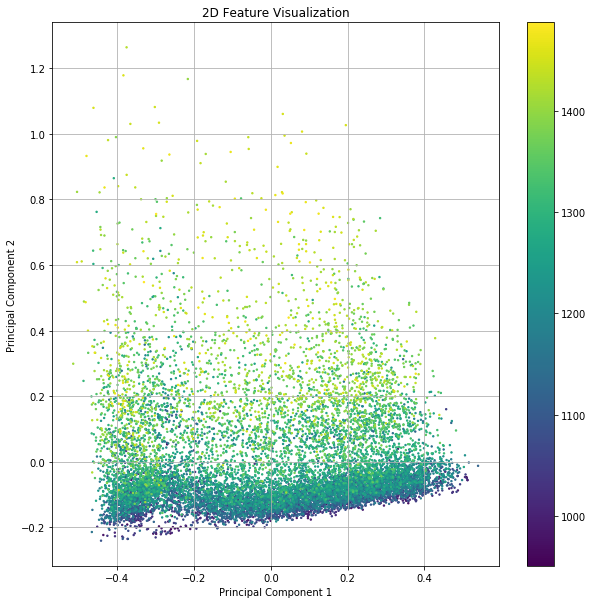

In [8]:
visualize_2d(X_scaled, y)

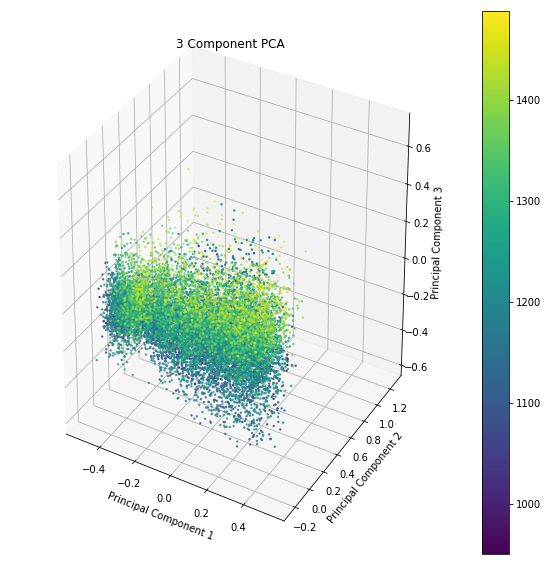

In [9]:
visualize_3d(X_scaled, y)